
# METODE KEMOMETRIK PCA-SVM

---



# Import Library

In [1]:
import sys
print("python: ", sys.version)
import numpy as np
print("numpy: ", np.__version__)
import pandas as pd
print("pandas: ", pd.__version__)
import sklearn
print("sklearn: ", sklearn.__version__)
from sklearn.model_selection import train_test_split
import matplotlib
print("matplotlib: ", matplotlib.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print("seaborn: ", sns.__version__)

python:  3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy:  1.25.2
pandas:  2.0.3
sklearn:  1.2.2
matplotlib:  3.7.1
seaborn:  0.13.1


# ANALISIS DESKRIPTIF

## Input Dataset

In [3]:
# Input dataset
DataMinyak = pd.read_excel("/content/Data Sigma2.xlsx", sheet_name="Data Sigma2")

In [4]:
# Memeriksa dataset
print(DataMinyak.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      15 non-null     float64
 1   G2      15 non-null     float64
 2   G3      15 non-null     float64
 3   G4      15 non-null     float64
 4   G5      15 non-null     float64
 5   G6      15 non-null     float64
 6   G7      15 non-null     float64
 7   G8      15 non-null     float64
 8   G9      15 non-null     float64
 9   G10     15 non-null     float64
 10  G11     15 non-null     float64
 11  G12     15 non-null     float64
 12  G13     15 non-null     float64
 13  G14     15 non-null     float64
 14  G15     15 non-null     float64
 15  G16     15 non-null     float64
 16  G17     15 non-null     float64
 17  G18     15 non-null     float64
 18  grup    15 non-null     int64  
dtypes: float64(18), int64(1)
memory usage: 2.4 KB
None


Berdasarkan output di atas, semua kolom tidak ada yang null dan tipe data sudah dalam format numerik

In [5]:
# Menyimpan nama kolom variabel x
column_X = DataMinyak.iloc[:, :-1].columns.tolist()

In [6]:
# Membuat variabel X dan Y
X,Y = DataMinyak.iloc[:,:18].values, DataMinyak.iloc[:,18].values
print("Data X :\n", X)
print("")
print("Data Y :\n",Y)

Data X :
 [[300.7024144 292.4085056 285.2718864 174.7507296 174.3649664 146.590016
  145.8184896 141.767976  137.7174624 136.3672912 123.8299872 116.3076048
  111.6784464 109.942512  102.9987744  96.8265632  91.2329968  72.1377184]
 [300.7024144 292.4085056 285.464768  174.7507296 146.590016  145.8184896
  141.9608576 139.4533968 137.7174624 136.3672912 123.8299872 116.3076048
  111.871328  109.942512  102.8058928  97.0194448  91.2329968  72.1377184]
 [300.7024144 292.4085056 285.2718864 174.7507296 146.3971344 145.625608
  141.767976  137.7174624 136.1744096 123.8299872 116.3076048 111.871328
  109.942512  102.9987744  91.2329968  86.9896016  85.4465488  72.1377184]
 [300.5095328 292.4085056 285.2718864 238.208776  174.3649664 146.590016
  145.8184896 141.9608576 140.0320416 137.7174624 136.3672912 123.8299872
  116.3076048 111.871328  109.7496304 102.8058928  97.0194448  72.3306   ]
 [300.7024144 292.4085056 285.2718864 238.5945392 174.7507296 146.3971344
  145.625608  141.767976  14

## 1. Melakukan pemisahan data training (70%) dan data testing (30%)

In [7]:
# Pemisahan data train dan data test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 0)
print(" Data Train X:\n", X_train)
print("")
print(" Data Train Y:\n", Y_train)

 Data Train X:
 [[300.7024144 292.4085056 285.2718864 238.5945392 174.7507296 146.3971344
  145.625608  141.767976  140.2249232 137.7174624 136.1744096 123.8299872
  116.3076048 111.871328  109.7496304 102.9987744  96.8265632  72.3306   ]
 [300.7024144 292.4085056 285.2718864 174.7507296 146.3971344 145.625608
  141.767976  137.7174624 136.1744096 123.8299872 116.3076048 111.871328
  109.942512  102.9987744  91.2329968  86.9896016  85.4465488  72.1377184]
 [300.5095328 292.4085056 285.2718864 235.8941968 234.1582624 174.7507296
  145.8184896 141.767976  137.5245808 136.1744096 133.8598304 131.7381328
  123.8299872 116.5004864 111.871328  109.942512  103.191656   72.1377184]
 [300.5095328 292.4085056 285.2718864 235.8941968 234.1582624 174.7507296
  145.8184896 141.767976  137.7174624 135.5957648 134.052712  131.3523696
  123.8299872 116.3076048 111.871328  109.7496304 102.9987744  72.1377184]
 [346.9939984 300.5095328 292.4085056 285.464768  238.0158944 234.9297888
  174.7507296 145.81

In [8]:
# Membuat dataframe data training
# Y_train, X_train = pd.DataFrame(Y_train), pd.DataFrame(X_train)
# X_train.columns = column_X
# Y_train.columns = ["grup"]

# Menyatukan Y_train dan X_train
# data_train = pd.concat([Y_train,X_train], axis=1)
# data_train

In [9]:
# Membuat dataframe data testing
# Y_test, X_test = pd.DataFrame(Y_test), pd.DataFrame(X_test)
# X_test.columns = column_X
# Y_test.columns = ["grup"]

# Menyatukan Y_test dan X_test
# data_test = pd.concat([Y_test,X_test], axis=1)
# data_test

# 2. Menghitung rata-rata dan varians setiap variabel data

In [10]:
# Data training
X_train = pd.DataFrame(X_train)
X_train_count = X_train.count()
X_train_mean = X_train.mean()
X_train_var = X_train.var()
X_train_std = X_train.std()

# Membuat DataFrame baru
X_train_des = pd.DataFrame({"Variabel" : column_X, "Rata-Rata" : X_train_mean, "Varians": X_train_var, "Jumlah": X_train_count})
X_train_des

,Variabel,Rata-Rata,Varians,Jumlah
0,G1,305.235132,215.293497,10
1,G2,293.218608,6.562664,10
2,G3,285.985548,5.093133,10
3,G4,229.374799,1058.688852,10
4,G5,201.908459,1283.148832,10
5,G6,166.572550,775.996595,10
6,G7,148.268086,88.172262,10
7,G8,141.787264,3.649645,10
8,G9,138.681870,3.125078,10
9,G10,135.692206,18.702931,10


In [11]:
# Data testing
X_test = pd.DataFrame(X_test)
X_test_count = X_test.count()
X_test_mean = X_test.mean()
X_test_var = X_test.var()
X_test_std = X_test.std()

X_test.columns = column_X

# Membuat DataFrame baru
X_test_des = pd.DataFrame({"Variabel" : column_X, "Rata-Rata" : X_test_mean, "Varians": X_test_var, "Jumlah": X_test_count})
X_test_des

,Variabel,Rata-Rata,Varians,Jumlah
0,G1,319.180472,644.666424,5
1,G2,295.648916,19.687993,5
2,G3,288.203687,14.739952,5
3,G4,243.455156,2087.020214,5
4,G5,218.226242,1607.584858,5
5,G6,192.997329,1603.864527,5
6,G7,162.329155,681.724643,5
7,G8,149.406087,201.876330,5
8,G9,145.316997,156.990534,5
9,G10,138.990481,16.715448,5


# 3.	Menampilkan boxplot dari setiap variabel data

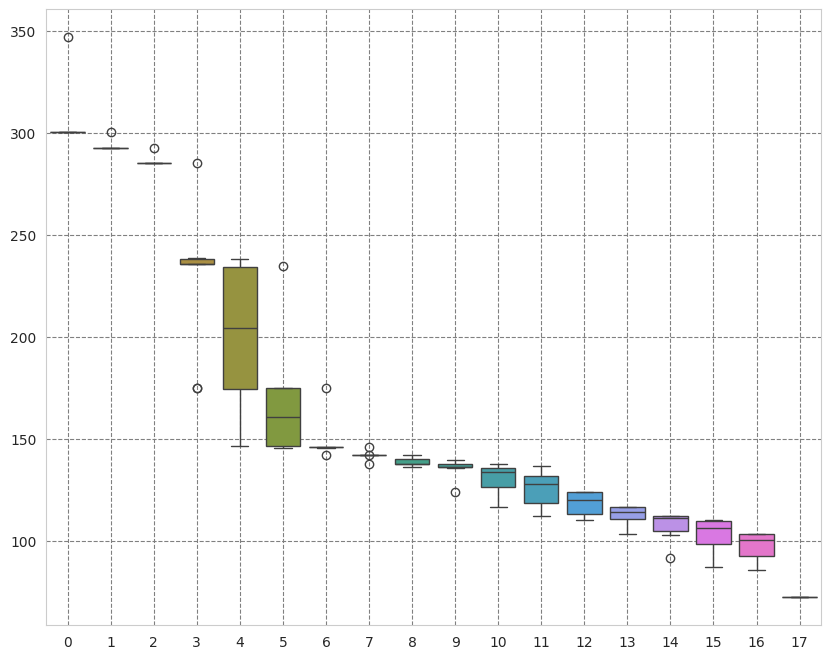

In [12]:
# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Mengatur gaya plot menjadi 'whitegrid'
sns.set_style('whitegrid')

# Input data yang akan ditampilkan
sns.boxplot(data=X_train)

# Menambahkan grid vertikal dan horizontal
plt.grid(axis='both', color='gray', linestyle='--')

# Menampilkan boxplot
plt.show()

# 4. Menampilkan boxplot dari setiap unit sampel data

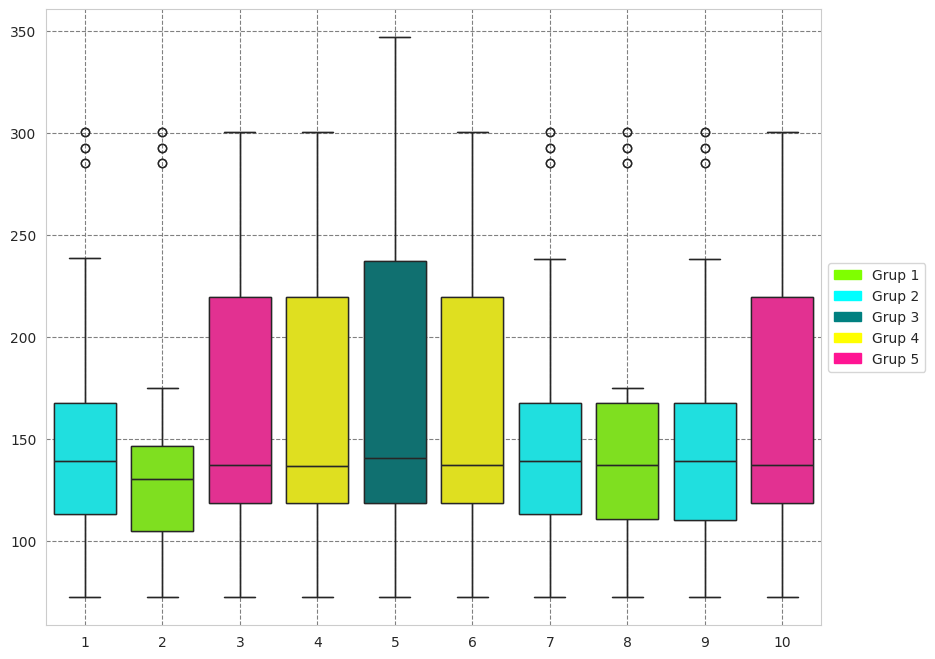

In [13]:
import matplotlib.patches as mpatches

col_sampel = [1,2,3,4,5,6,7,8,9,10]
X_train_sampel = X_train.T
X_train_sampel.columns = col_sampel
# Mengatur ukuran gambar
plt.figure(figsize=(10, 8))

# Mengatur gaya plot menjadi 'whitegrid'
sns.set_style('whitegrid')

# Input data yang akan ditampilkan
sns.boxplot(data=X_train_sampel)

# Menentukan warna untuk setiap nomor sampel
color_map = {1: 'cyan', 2: 'chartreuse', 3: 'deeppink', 4: 'yellow', 5: 'teal', 6: 'yellow', 7: 'cyan', 8: 'chartreuse', 9: 'cyan', 10: 'deeppink'}
palette_colors = [color_map[sampel] for sampel in col_sampel]

# Membuat boxplot dengan warna berdasarkan nomor sampel
sns.boxplot(data=X_train_sampel, palette=palette_colors)

# Menambahkan grid vertikal dan horizontal
plt.grid(axis='both', color='gray', linestyle='--')

# Membuat custom legend
color_legend = ['chartreuse', 'cyan', 'teal', "yellow", "deeppink"]
legend_labels = ["Grup 1", "Grup 2", "Grup 3", "Grup 4", "Grup 5"]
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(color_legend, legend_labels)]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5))

# Menampilkan boxplot
plt.show()

# 5.	Menampilkan scatter plot antar variabel yang memiliki korelasi.

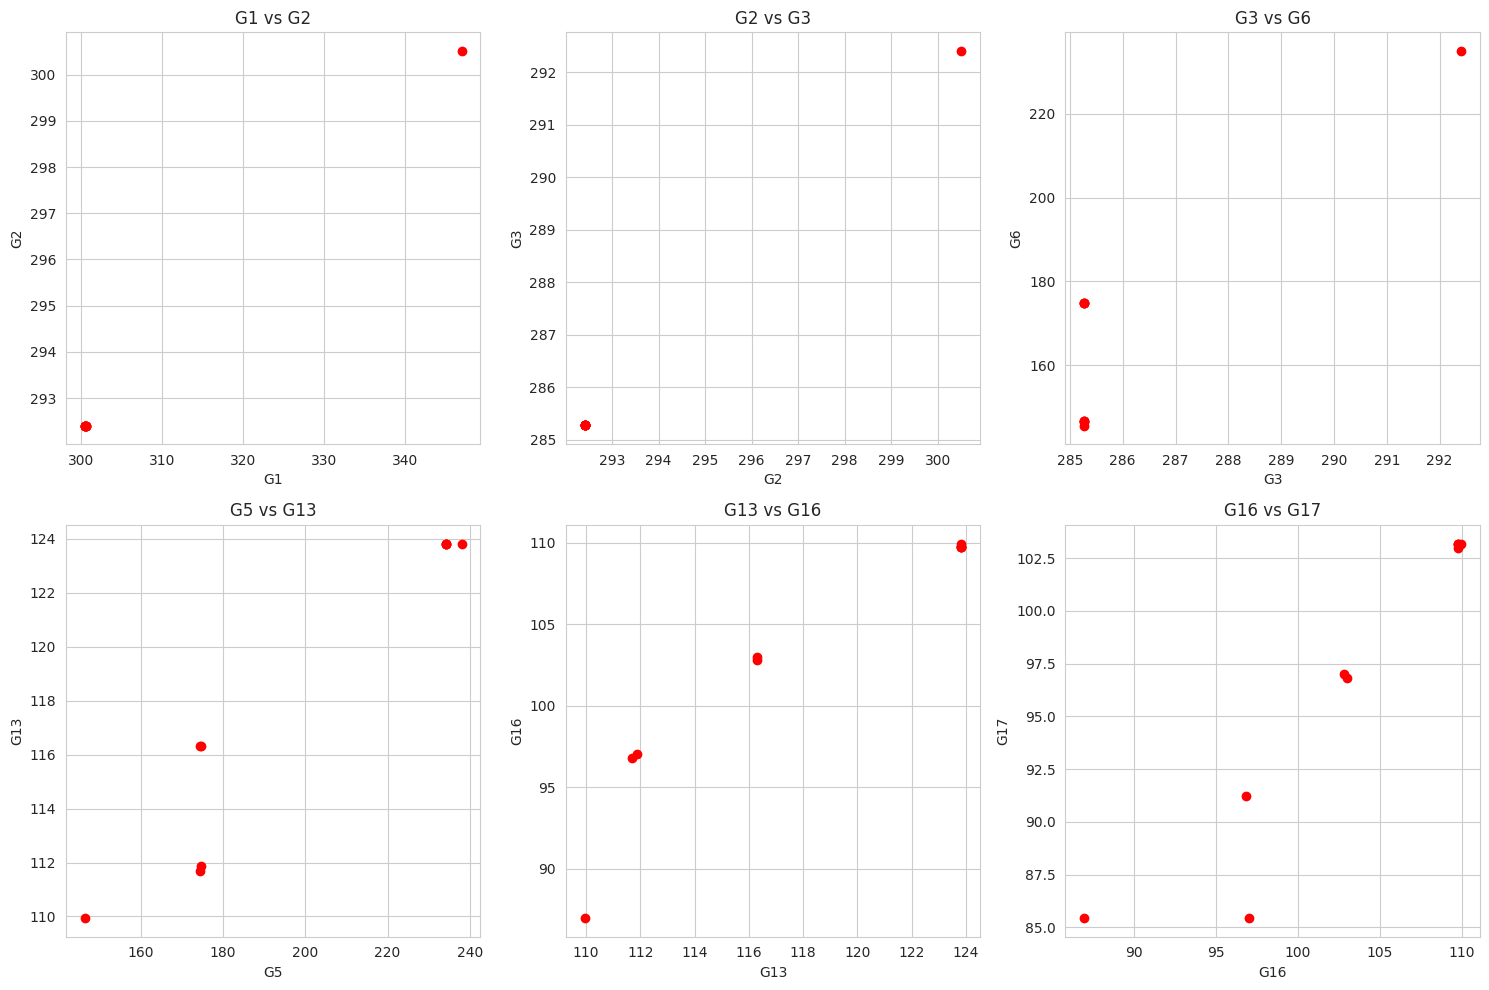

In [14]:
# Membuat scatter plot
plt.figure(figsize=(15, 10))

data_x = pd.DataFrame(X_train)
data_x.columns = column_X

# Scatter plot G1 vs G2
plt.subplot(231)
plt.scatter(data_x['G1'], data_x['G2'], color='red')
plt.xlabel('G1')
plt.ylabel('G2')
plt.title('G1 vs G2')

# Scatter plot G2 vs G3
plt.subplot(232)
plt.scatter(data_x['G2'], data_x['G3'], color='red')
plt.xlabel('G2')
plt.ylabel('G3')
plt.title('G2 vs G3')

# Scatter plot G3 vs G6
plt.subplot(233)
plt.scatter(data_x['G3'], data_x['G6'], color='red')
plt.xlabel('G3')
plt.ylabel('G6')
plt.title('G3 vs G6')

# Scatter plot G5 vs G13
plt.subplot(234)
plt.scatter(data_x['G5'], data_x['G13'], color='red')
plt.xlabel('G5')
plt.ylabel('G13')
plt.title('G5 vs G13')

# Scatter plot G13 vs G16
plt.subplot(235)
plt.scatter(data_x['G13'], data_x['G16'], color='red')
plt.xlabel('G13')
plt.ylabel('G16')
plt.title('G13 vs G16')

# Scatter plot G16 vs G17
plt.subplot(236)
plt.scatter(data_x['G16'], data_x['G17'], color='red')
plt.xlabel('G16')
plt.ylabel('G17')
plt.title('G16 vs G17')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [15]:
X_train.columns = column_X

# 6. Menghitung matriks kovarians

In [16]:
# Matriks kovarians
matcov = X_train.cov()
matcov

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18
G1,215.293497,37.587746,33.113014,287.697342,184.821918,351.926793,136.480349,20.732579,16.873769,19.240313,34.473002,55.695424,27.131548,18.709132,21.805274,31.600080,30.825011,-0.299693
G2,37.587746,6.562664,5.781395,50.487374,32.500813,61.529317,23.837402,3.628563,2.951463,3.385501,6.059179,9.774550,4.774425,3.298694,3.854263,5.573056,5.416802,-0.052085
G3,33.113014,5.781395,5.093133,44.476972,28.631669,54.204398,20.999616,3.196591,2.600098,2.982465,5.337848,8.610913,4.206041,2.905992,3.395422,4.909597,4.771945,-0.045884
G4,287.697342,50.487374,44.476972,1058.688852,740.273148,637.804480,204.558689,50.016959,42.833413,98.411027,186.358829,211.461970,130.955657,105.272971,165.763075,190.213092,149.765651,0.580372
G5,184.821918,32.500813,28.631669,740.273148,1283.148832,764.578485,140.948466,40.643378,4.166771,72.562992,170.945910,281.907680,204.907573,149.925212,194.894095,260.930800,237.380277,-1.758477
G6,351.926793,61.529317,54.204398,637.804480,764.578485,775.996595,229.431996,39.763726,19.746691,42.370438,104.108920,184.854161,119.418497,81.103219,97.328824,140.655800,135.048848,-1.288888
G7,136.480349,23.837402,20.999616,204.558689,140.948466,229.431996,88.172262,14.791623,11.657038,17.376013,28.073206,40.948858,20.848322,16.154505,20.988455,27.239851,24.502101,-0.161628
G8,20.732579,3.628563,3.196591,50.016959,40.643378,39.763726,14.791623,3.649645,2.633168,7.074830,9.750988,10.988618,6.202619,6.055872,9.334724,10.227190,7.983004,0.002894
G9,16.873769,2.951463,2.600098,42.833413,4.166771,19.746691,11.657038,2.633168,3.125078,5.402748,6.618056,4.059295,0.959019,2.025514,4.658681,3.592186,1.566673,0.090941
G10,19.240313,3.385501,2.982465,98.411027,72.562992,42.370438,17.376013,7.074830,5.402748,18.702931,22.820098,19.934774,11.316007,13.682551,23.541429,23.092922,15.679129,0.130212


# 7. Menghitung matriks korelasi

In [17]:
X_train.corr()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18
G1,1.000000,0.999979,0.999979,0.602610,0.351641,0.861008,0.990578,0.739627,0.650528,0.303209,0.331069,0.453898,0.312379,0.285480,0.219512,0.273620,0.284924,-0.219221
G2,0.999979,1.000000,1.000000,0.605701,0.354173,0.862208,0.990952,0.741428,0.651729,0.305582,0.333295,0.456259,0.314850,0.288296,0.222235,0.276394,0.286777,-0.218218
G3,0.999979,1.000000,1.000000,0.605701,0.354173,0.862208,0.990952,0.741428,0.651729,0.305582,0.333295,0.456259,0.314850,0.288296,0.222235,0.276394,0.286777,-0.218218
G4,0.602610,0.605701,0.605701,1.000000,0.635140,0.703677,0.669526,0.804651,0.744677,0.699366,0.807088,0.777146,0.679927,0.724385,0.752515,0.742730,0.624265,0.191444
G5,0.351641,0.354173,0.354173,0.635140,1.000000,0.766220,0.419040,0.593917,0.065801,0.468405,0.672474,0.941072,0.966366,0.937072,0.803659,0.925468,0.898767,-0.526889
G6,0.861008,0.862208,0.862208,0.703677,0.766220,1.000000,0.877118,0.747191,0.400990,0.351705,0.526639,0.793513,0.724209,0.651846,0.516087,0.641508,0.657510,-0.496599
G7,0.990578,0.990952,0.990952,0.669526,0.419040,0.877118,1.000000,0.824564,0.702250,0.427887,0.421290,0.521471,0.375083,0.385181,0.330161,0.368564,0.353898,-0.184744
G8,0.739627,0.741428,0.741428,0.804651,0.593917,0.747191,0.824564,1.000000,0.779691,0.856320,0.719248,0.687816,0.548494,0.709722,0.721752,0.680151,0.566738,0.016257
G9,0.650528,0.651729,0.651729,0.744677,0.065801,0.400990,0.702250,0.779691,1.000000,0.706691,0.527540,0.274584,0.091647,0.256532,0.389264,0.258168,0.120196,0.552144
G10,0.303209,0.305582,0.305582,0.699366,0.468405,0.351705,0.427887,0.856320,0.706691,1.000000,0.743563,0.551202,0.442039,0.708352,0.804062,0.678420,0.491709,0.323159


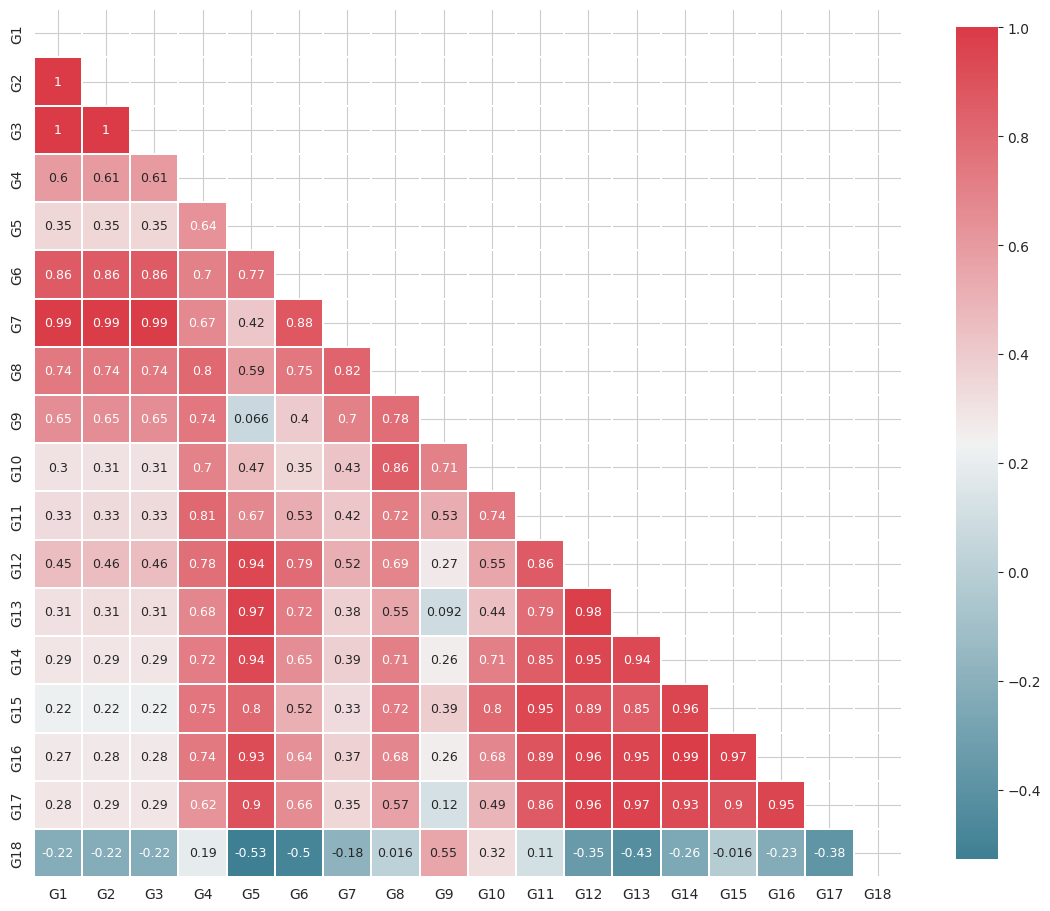

In [18]:
# Membuat fungsi untuk heatmap korelasi antar variabel
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    # Membuat mask untuk bagian atas dari heatmap
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        mask=mask,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,
        vmax=1.0,
        linecolor='white',
        annot_kws={'fontsize':9 }
    )

correlation_heatmap(X_train)

# PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis (PCA) adalah salah satu teknik analisis eksplorasi yang populer digunakan dalam kemometrik (Hayati dkk., 2023), yang bertujuan untuk mengurangi dimensi spektra menjadi sejumlah kecil komponen utama (Marengo & Robotti, 2016).

## 1. Menghitung matriks covarians, eigenvalue, dan eigenvector

In [19]:
# Menghitung matriks kovarians
cov_mat = np.cov(X_train.T)

# Menghitung eigenvalue dan eigenvector
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

# Menentukan jumlah komponen utama
cum_var_exp = np.cumsum(var_exp)

In [20]:
# Save File Matriks Kovarians
# print("Matriks Kovarians:\n", cov_mat)
# cov_mat.to_excel("Matriks Kovarians.xlsx")

In [21]:
# Menampilkan eigenvalue dan eigenvector
print("Eigenvalue:\n", eigen_vals)
print("")
print("Varians kumulatif:\n", cum_var_exp)

Eigenvalue:
 [ 2.89445065e+03+0.00000000e+00j  5.07951159e+02+0.00000000e+00j
  3.42765004e+02+0.00000000e+00j  3.45339155e+01+0.00000000e+00j
  1.61090484e+01+0.00000000e+00j  3.95433015e-02+0.00000000e+00j
  1.62774887e-02+0.00000000e+00j  7.54931549e-03+0.00000000e+00j
  1.40848186e-03+0.00000000e+00j  5.82115798e-14+0.00000000e+00j
  3.05847459e-14+5.98053464e-15j  3.05847459e-14-5.98053464e-15j
 -9.18863892e-15+1.62528589e-14j -9.18863892e-15-1.62528589e-14j
 -1.54219976e-14+0.00000000e+00j -7.48797499e-15+0.00000000e+00j
  6.07103218e-15+0.00000000e+00j  1.44882886e-18+0.00000000e+00j]

Varians kumulatif:
 [0.76252537+0.00000000e+00j 0.896342  +0.00000000e+00j
 0.98664135+0.00000000e+00j 0.9957391 +0.00000000e+00j
 0.99998293+0.00000000e+00j 0.99999335+0.00000000e+00j
 0.99999764+0.00000000e+00j 0.99999963+0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +1.57553537e-18j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e

In [22]:
# Save File Eigenvalue dan Eigenvector
# eigen_vals = pd.DataFrame (eigen_vals)
# eigen_vecs = pd.DataFrame (eigen_vecs)
# eigen_vals.to_excel("Eigenvalue.xlsx")
# eigen_vecs.to_excel("Eigenvector.xlsx")

## 2. Menentukan jumlah komponen utama yang akan digunakan

## 2.1 Menghitung proporsi varians kumulatif

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


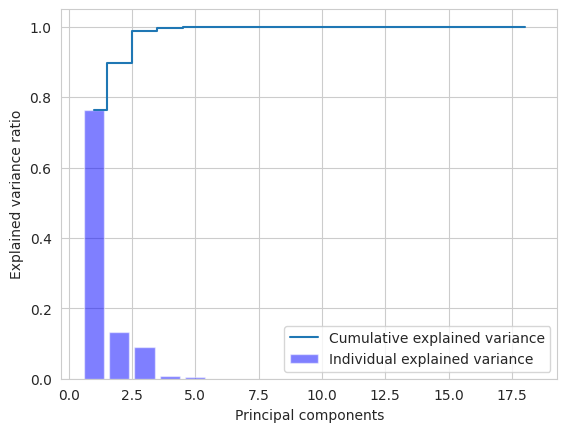

In [23]:
plt.bar(range(1, len(var_exp) + 1), var_exp, color= "blue", alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()

In [24]:
print(" Varians PC: \n", pd.DataFrame(var_exp))
print("")
print(" Varians Kumulatif PC: \n", pd.DataFrame(cum_var_exp))

 Varians PC: 
                              0
0   7.625254e-01+0.000000e+00j
1   1.338166e-01+0.000000e+00j
2   9.029935e-02+0.000000e+00j
3   9.097749e-03+0.000000e+00j
4   4.243831e-03+0.000000e+00j
5   1.041744e-05+0.000000e+00j
6   4.288205e-06+0.000000e+00j
7   1.988821e-06+0.000000e+00j
8   3.710560e-07+0.000000e+00j
9   1.533549e-17+0.000000e+00j
10  8.057365e-18+1.575535e-18j
11  8.057365e-18-1.575535e-18j
12  1.599376e-18+0.000000e+00j
13  3.816851e-22+0.000000e+00j
14 -1.972661e-18+0.000000e+00j
15 -2.420691e-18+4.281717e-18j
16 -2.420691e-18-4.281717e-18j
17 -4.062831e-18+0.000000e+00j

 Varians Kumulatif PC: 
                      0
0   0.762525+0.000000j
1   0.896342+0.000000j
2   0.986641+0.000000j
3   0.995739+0.000000j
4   0.999983+0.000000j
5   0.999993+0.000000j
6   0.999998+0.000000j
7   1.000000+0.000000j
8   1.000000+0.000000j
9   1.000000+0.000000j
10  1.000000+0.000000j
11  1.000000+0.000000j
12  1.000000+0.000000j
13  1.000000+0.000000j
14  1.000000+0.000000j
15

## 2.2 Menghitung rata-rata eigenvalue

In [25]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

In [26]:
print("Rata-rata eigenvalue:")
print(eigen_vals.mean())

Rata-rata eigenvalue:
(210.88191960822974+0j)


In [27]:
# Semua Komponen Utama
# all = np.hstack([eigen[1][:, np.newaxis] for eigen in eigen_pairs])
# print("Dua komponen utama:\n", pd.DataFrame(all))

## 2.3 Melihat Scoreplot

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


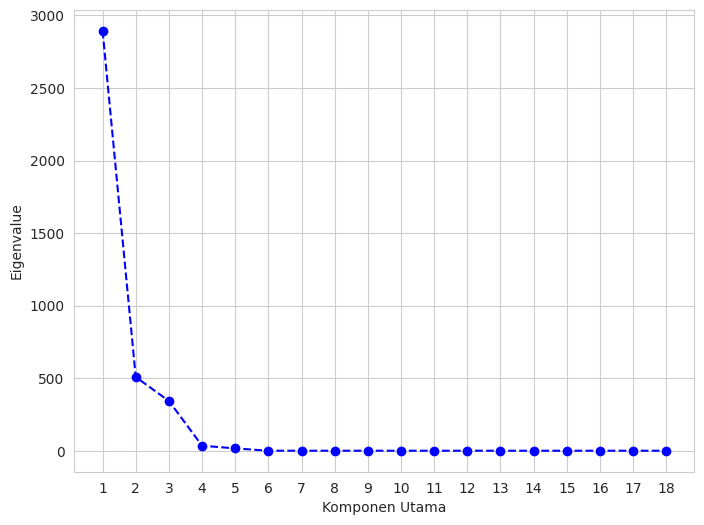

In [28]:
# Plot scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigen_vals) + 1), eigen_vals, marker='o', linestyle='--', color= "blue")
plt.xlabel('Komponen Utama')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(eigen_vals) + 1))
plt.grid(True)
plt.show()

## 3. Memilih dua Principal Components

In [29]:
# Eigenvector
W = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print("Dua komponen utama:\n", pd.DataFrame(W))

Dua komponen utama:
                      0                   1
0  -0.176940+0.000000j -0.389741+0.000000j
1  -0.031014+0.000000j -0.067991+0.000000j
2  -0.027322+0.000000j -0.059897+0.000000j
3  -0.524188+0.000000j -0.501337+0.000000j
4  -0.604838+0.000000j  0.659521+0.000000j
5  -0.469044+0.000000j -0.199075+0.000000j
6  -0.123870+0.000000j -0.235882+0.000000j
7  -0.028502+0.000000j -0.027524+0.000000j
8  -0.014455+0.000000j -0.061579+0.000000j
9  -0.047276+0.000000j -0.025959+0.000000j
10 -0.102063+0.000000j -0.000269+0.000000j
11 -0.147852+0.000000j  0.078933+0.000000j
12 -0.099108+0.000000j  0.099635+0.000000j
13 -0.073637+0.000000j  0.067087+0.000000j
14 -0.101090+0.000000j  0.068365+0.000000j
15 -0.129633+0.000000j  0.112730+0.000000j
16 -0.115037+0.000000j  0.122659+0.000000j
17  0.000535+0.000000j -0.002256+0.000000j


## 4. Mentransformasi (memproyeksikan) data ke dalam ruang PCA

In [30]:
# syntax ini dijalankan ulang agar bisa divisualisaikan di bawah
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 0)

In [31]:
X_train_pca = X_train.dot(W)
X_test_pca = X_test.dot(W)

In [32]:
print("Dua komponen utama data training:\n", X_train_pca)
print("")
print("Dua komponen utama data testing:\n", X_test_pca)

Dua komponen utama data training:
 [[-487.63544014+0.j -178.47656978+0.j]
 [-425.01356007+0.j -170.01816298+0.j]
 [-539.19507941+0.j -139.95687309+0.j]
 [-539.07176653+0.j -140.04257278+0.j]
 [-609.38206496+0.j -200.29131138+0.j]
 [-539.13476846+0.j -139.95793686+0.j]
 [-487.29971722+0.j -178.53788082+0.j]
 [-448.85138017+0.j -149.6422009 +0.j]
 [-481.7409347 +0.j -182.22332508+0.j]
 [-539.19278918+0.j -140.07860792+0.j]]

Dua komponen utama data testing:
 [[-431.1762441 +0.j -166.81690205+0.j]
 [-614.92427271+0.j -209.10993862+0.j]
 [-609.38206496+0.j -200.29131138+0.j]
 [-539.02467429+0.j -140.11216173+0.j]
 [-539.94625773+0.j -140.42473063+0.j]]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


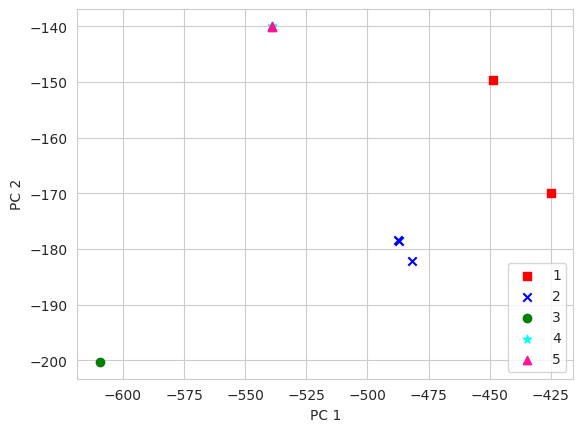

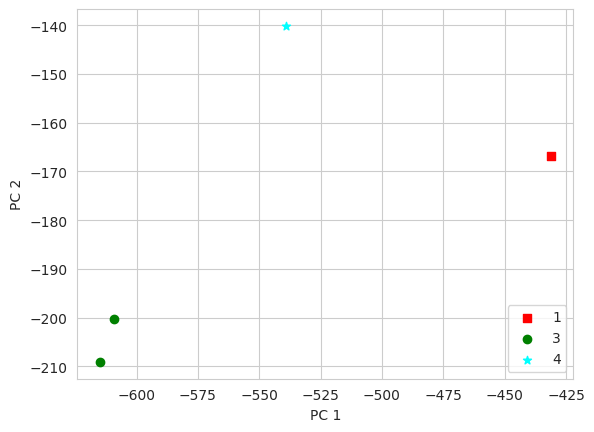

In [33]:
plt.subplot(1, 1, 1)
colors = ['red', 'blue', 'green','cyan','deeppink']
markers = ['s', 'x', 'o','*','^']

for label, color, marker in zip(np.unique(Y_train), colors, markers):
  plt.scatter(X_train_pca[Y_train == label, 0], X_train_pca[Y_train == label, 1], c=color, label=label, marker=marker, zorder=2)

# Additional plot settings
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

plt.subplot(1, 1, 1)
colors = ['red', 'green','cyan']
markers = ['s', 'o','*']

for label, color, marker in zip(np.unique(Y_test), colors, markers):
  plt.scatter(X_test_pca[Y_test == label, 0], X_test_pca[Y_test == label, 1], c=color, label=label, marker=marker,zorder=2)

# Additional plot settings
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## 5. Membuat visualisasi individu dan variabel dengan dua komponen utama pertama.

In [34]:
# Memilih 2 eigenvector dan 2 eigenvalue
eigen_vecs_selected = eigen_vecs[:,:2]
eigen_vals_selected = eigen_vals[:2]

# Konversi nilai eigen menjadi matriks diagonal
eigen_vals_diag = np.diag(np.sqrt(eigen_vals_selected))

print(eigen_vecs_selected)
print(eigen_vals_diag)

[[-1.76940479e-01+0.j -3.89740917e-01+0.j]
 [-3.10140600e-02+0.j -6.79913197e-02+0.j]
 [-2.73219100e-02+0.j -5.98971150e-02+0.j]
 [-5.24188285e-01+0.j -5.01337074e-01+0.j]
 [-6.04837588e-01+0.j  6.59521058e-01+0.j]
 [-4.69044489e-01+0.j -1.99074981e-01+0.j]
 [-1.23869575e-01+0.j -2.35881508e-01+0.j]
 [-2.85018906e-02+0.j -2.75237731e-02+0.j]
 [-1.44550782e-02+0.j -6.15790826e-02+0.j]
 [-4.72759995e-02+0.j -2.59592526e-02+0.j]
 [-1.02062736e-01+0.j -2.69139840e-04+0.j]
 [-1.47851522e-01+0.j  7.89328348e-02+0.j]
 [-9.91076767e-02+0.j  9.96345488e-02+0.j]
 [-7.36366362e-02+0.j  6.70874456e-02+0.j]
 [-1.01090203e-01+0.j  6.83645844e-02+0.j]
 [-1.29632687e-01+0.j  1.12730147e-01+0.j]
 [-1.15036522e-01+0.j  1.22658720e-01+0.j]
 [ 5.35174273e-04+0.j -2.25599266e-03+0.j]]
[[53.80009895+0.j  0.        +0.j]
 [ 0.        +0.j 22.53777183+0.j]]


In [35]:
# Hitung nilai loading
loadings = np.dot(eigen_vecs_selected, eigen_vals_diag)

# Tampilkan nilai loading
print(loadings)

[[-9.51941527e+00+0.j -8.78389187e+00+0.j]
 [-1.66855950e+00+0.j -1.53237285e+00+0.j]
 [-1.46992146e+00+0.j -1.34994751e+00+0.j]
 [-2.82013816e+01+0.j -1.12990206e+01+0.j]
 [-3.25403221e+01+0.j  1.48641351e+01+0.j]
 [-2.52346399e+01+0.j -4.48670649e+00+0.j]
 [-6.66419541e+00+0.j -5.31624361e+00+0.j]
 [-1.53340453e+00+0.j -6.20324518e-01+0.j]
 [-7.77684637e-01+0.j -1.38785531e+00+0.j]
 [-2.54345345e+00+0.j -5.85063711e-01+0.j]
 [-5.49098531e+00+0.j -6.06581230e-03+0.j]
 [-7.95442653e+00+0.j  1.77897022e+00+0.j]
 [-5.33200281e+00+0.j  2.24554073e+00+0.j]
 [-3.96165831e+00+0.j  1.51200154e+00+0.j]
 [-5.43866293e+00+0.j  1.54078540e+00+0.j]
 [-6.97425137e+00+0.j  2.54068633e+00+0.j]
 [-6.18897625e+00+0.j  2.76445424e+00+0.j]
 [ 2.87924288e-02+0.j -5.08450478e-02+0.j]]


In [36]:
def myplot(score,coeff,labels=None):
    """
    ------
    Input

    score: skor (data diproyeksikan ke 2 komponen pertama)
    coeff: beban (vektor eigen)
    labels: label variabel (opsional)

    Output
    ------
    plotting of the biplot
    """
    n = coeff.shape[0]

    #create figure and axis objects
    fig,ax = plt.subplots(figsize=(15,8))

    colors = ['red', 'blue', 'green','cyan','deeppink']
    markers = ['s', 'x', 'o','*','^']

    for label, color, marker in zip(np.unique(Y_train), colors, markers):
        plt.scatter(X_train_pca[Y_train == label, 0], X_train_pca[Y_train == label, 1], c=color, label=label, marker=marker, zorder=2)

    #set x-axis label
    ax.set_xlabel("PC1",fontsize=10)
    #set y-axis label
    ax.set_ylabel("PC2",fontsize=10)

    #create a second set of axes
    ax2 = ax.twinx().twiny()

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'red',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.02, coeff[i,1] * 1.02, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.02, coeff[i,1] * 1.02, labels[i], color = 'green', ha = 'center', va = 'center')

    # Additional plot settings
    ax.grid(True)
    ax.legend(loc='lower right')

    #show plot
    plt.show()

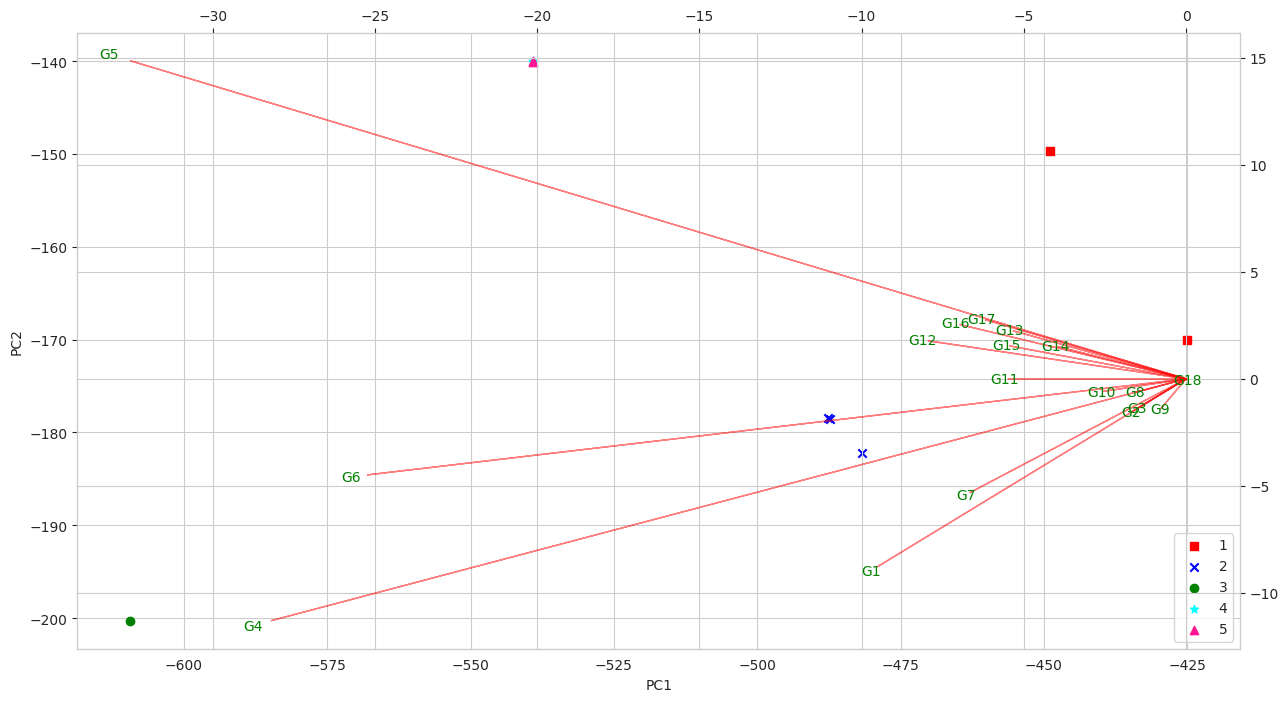

In [37]:
# Menampilkan biplot

score = pd.DataFrame(np.real(X_train_pca))
coeff = np.real(loadings)
labels = column_X

'''
  Pastikan X_train_pca adalah DataFrame
  loadings adalah Array

  Cek dengan:
  type(Y_train)

  !!! Jika tipe data tidak sesuai, maka akan ERROR

'''
myplot(score, coeff, labels=column_X)

# SUPPORT VECTOR MACHINE (SVM)

Suppport Vector Machine (SVM) adalah metode yang membuat hyperplane terpisah dalam ruang n-dimensi dengan memaksimalkan margin antara dua kelas (Hayati dkk., 2023).

Data yang digunakan dalam perhitungan SVM adalah dua komponen utama hasil reduksi data training dari PCA

## 1. Mengimport library

In [38]:
from sklearn import svm
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
import seaborn as sns

## 2. Mengubah data komponen utama yang kompleks menjadi dara real

In [39]:
X_train_svm = np.real(X_train_pca)
X_train_svm = pd.DataFrame(X_train_svm)
X_test_svm = np.real(X_test_pca)
X_test_svm = pd.DataFrame(X_test_svm)
print("Data X Train\n", X_train_svm)
print("")
print("Data X Test\n", X_test_svm)

Data X Train
             0           1
0 -487.635440 -178.476570
1 -425.013560 -170.018163
2 -539.195079 -139.956873
3 -539.071767 -140.042573
4 -609.382065 -200.291311
5 -539.134768 -139.957937
6 -487.299717 -178.537881
7 -448.851380 -149.642201
8 -481.740935 -182.223325
9 -539.192789 -140.078608

Data X Test
             0           1
0 -431.176244 -166.816902
1 -614.924273 -209.109939
2 -609.382065 -200.291311
3 -539.024674 -140.112162
4 -539.946258 -140.424731


In [40]:
# Save file data train_svm
# X_train_svm = pd.DataFrame(X_train_svm)
# X_train_svm.to_excel("train_svm.xlsx")

In [41]:
# Save file data test_svm
# X_test_svm = pd.DataFrame(X_test_svm)
# X_test_svm.to_excel("test_svm.xlsx")

# 3. Membuat model terbaik

In [42]:
# Definisikan parameter yang akan diuji
param_grid = [
    {'estimator__kernel': ['poly'], 'estimator__C': [0.1, 1, 3, 5], 'estimator__degree': [1, 2, 3, 4, 5]},
    {'estimator__kernel': ['rbf'], 'estimator__C': [0.1, 1, 3, 5], 'estimator__gamma': [1, 0.1, 0.01, 0.0001]},
    {'estimator__kernel': ['linear'], 'estimator__C': [0.1, 1, 3, 5]}
]

# Buat objek StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

# Buat objek GridSearchCV dengan StratifiedKFold dan OneVsOneClassifier
model = GridSearchCV(OneVsOneClassifier(SVC()), param_grid, refit=True, verbose=3, cv=skf)

# Latih model dengan data
model.fit(X_train_svm, Y_train)

# Tampilkan parameter terbaik
print(model.best_params_)

# Buat prediksi menggunakan model terbaik
model_predictions = model.predict(X_train_svm)

# Tampilkan evaluasi model
print(classification_report(Y_train, model_predictions))

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV 1/2] END estimator__C=0.1, estimator__degree=1, estimator__kernel=poly;, score=1.000 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


[CV 2/2] END estimator__C=0.1, estimator__degree=1, estimator__kernel=poly;, score=0.200 total time=   0.1s
[CV 1/2] END estimator__C=0.1, estimator__degree=2, estimator__kernel=poly;, score=1.000 total time=   0.1s
[CV 2/2] END estimator__C=0.1, estimator__degree=2, estimator__kernel=poly;, score=0.200 total time=   0.1s
[CV 1/2] END estimator__C=0.1, estimator__degree=3, estimator__kernel=poly;, score=1.000 total time=   0.1s
[CV 2/2] END estimator__C=0.1, estimator__degree=3, estimator__kernel=poly;, score=0.400 total time=   0.1s
[CV 1/2] END estimator__C=0.1, estimator__degree=4, estimator__kernel=poly;, score=1.000 total time=   0.1s
[CV 2/2] END estimator__C=0.1, estimator__degree=4, estimator__kernel=poly;, score=0.800 total time=   0.0s
[CV 1/2] END estimator__C=0.1, estimator__degree=5, estimator__kernel=poly;, score=1.000 total time=   0.0s
[CV 2/2] END estimator__C=0.1, estimator__degree=5, estimator__kernel=poly;, score=0.800 total time=   0.1s
[CV 1/2] END estimator__C=1,

In [43]:
# Model Fungsi Polynomial PCA-SVM
modelP = OneVsOneClassifier(SVC(kernel='poly', C=0.1, degree=4))
# Melatih model SVM-PCA
modelP.fit(X_train_svm, Y_train)

OneVsOneClassifier(estimator=SVC(C=0.1, degree=4, kernel='poly'))

In [44]:
# Model PCA-SVM
print("Model PCA-SVM :")
Y_pred = modelP.predict(X_train_svm)
print('Accuracy of SVM classification on train set: {:.2f}'.
      format(modelP.score(X_train_svm,Y_train)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_train, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_train, Y_pred)
print(class_report)

Model PCA-SVM :
Accuracy of SVM classification on train set: 1.00
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [45]:
for i in range(5):
    for j in range(i+1, 5):
        model_idx = i * (5 - 1) - (i - 1) * i // 2 + (j - i - 1)
        model = modelP.estimators_[model_idx]
        n_support_vectors = len(model.support_)
        print(f"Info model SVM RBF untuk kelas {i} vs {j}: number of support vectors = {n_support_vectors}")

Info model SVM RBF untuk kelas 0 vs 1: number of support vectors = 2
Info model SVM RBF untuk kelas 0 vs 2: number of support vectors = 2
Info model SVM RBF untuk kelas 0 vs 3: number of support vectors = 2
Info model SVM RBF untuk kelas 0 vs 4: number of support vectors = 2
Info model SVM RBF untuk kelas 1 vs 2: number of support vectors = 2
Info model SVM RBF untuk kelas 1 vs 3: number of support vectors = 2
Info model SVM RBF untuk kelas 1 vs 4: number of support vectors = 2
Info model SVM RBF untuk kelas 2 vs 3: number of support vectors = 2
Info model SVM RBF untuk kelas 2 vs 4: number of support vectors = 2
Info model SVM RBF untuk kelas 3 vs 4: number of support vectors = 4


## 4. Memvisualisasikan plot PCA-SVM Polynomial Data training

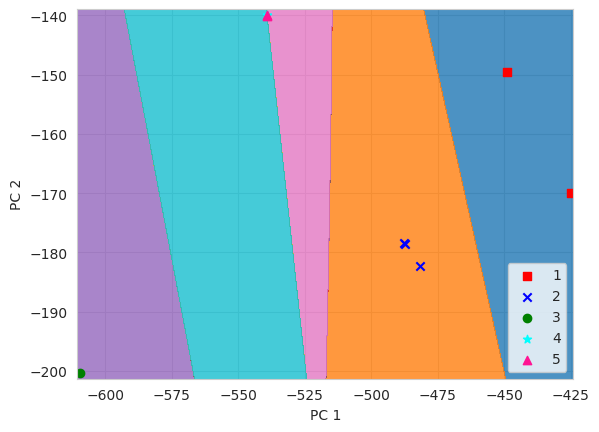

In [52]:
# Data
X = X_train_svm
y = Y_train

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot batas keputusan
Z = modelP.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)

# Plot titik data
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X.loc[y == label, X.columns[0]], X.loc[y == label, X.columns[1]], c=color, label=label, marker=marker)


# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

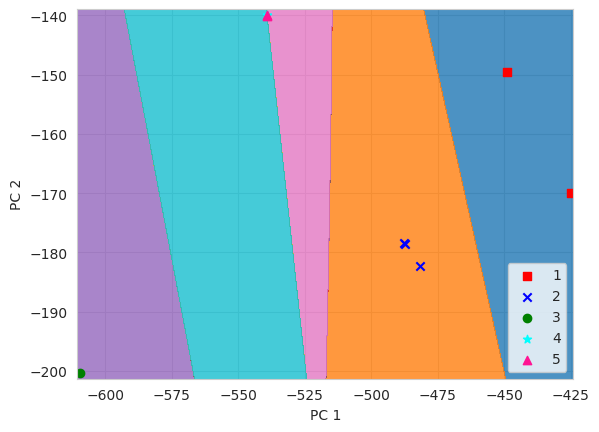

In [53]:
# Data Predict
Y_pred = modelP.predict(X_train_svm)
X = X_train_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'b', 'g', 'cyan', 'deeppink']
markers = ['s', 'x', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot batas keputusan
Z = modelP.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)

# Plot titik data
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X.loc[y == label, X.columns[0]], X.loc[y == label, X.columns[1]], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()

# 5. Memprediksi Data Testing

In [54]:
Y_pred = modelP.predict(X_test_svm)
print('Accuracy of SVM classification on test set: {:.2f}'.
      format(modelP.score(X_test_svm,Y_test)))

# Confusion matrix dan classification report
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

class_report = classification_report(Y_test, Y_pred)
print(class_report)

Accuracy of SVM classification on test set: 1.00
[[1 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# 6. Memvisualisasikan plot PCA-SVM Polynomial Data testing

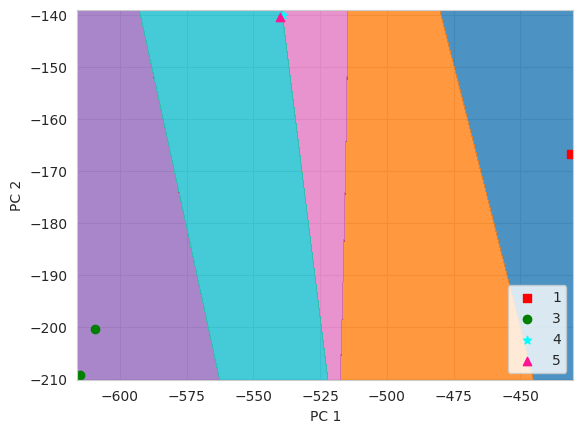

In [55]:
# Data Predict
Y_pred = modelP.predict(X_test_svm)
X = X_test_svm
y = Y_pred

# Warna dan simbol
colors = ['r', 'g', 'cyan', 'deeppink']
markers = ['s', 'o', '*', '^']

# Membuat meshgrid untuk membuat plot
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot batas keputusan
Z = modelP.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.8)

# Plot titik data
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X.loc[y == label, X.columns[0]], X.loc[y == label, X.columns[1]], c=color, label=label, marker=marker)

# Menambahkan judul dan label sumbu
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='lower right')
plt.show()